Our project goal is to use various clustering techniques to segment customers. Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Thus, there is no outcome to be predicted, and the algorithm just tries to find patterns in the data.



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Wholesale customers.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Missing Value Analysis

In [3]:
df.isnull().any()

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

# Outlier Analysis

In [4]:
cnames=[ 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

In [5]:
def continous_data(i):
    if df[i].dtype!='object':
        print('--'*60)
        sns.boxplot(df[i])
        plt.title("Boxplot of "+str(i))
        plt.show()
        plt.title("histogram of "+str(i))        
        df[i].plot.hist(bins = 20)
        plt.show()

------------------------------------------------------------------------------------------------------------------------


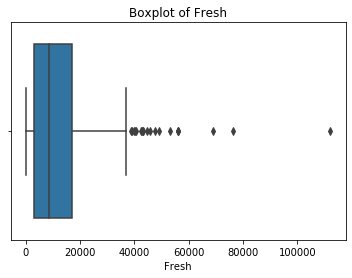

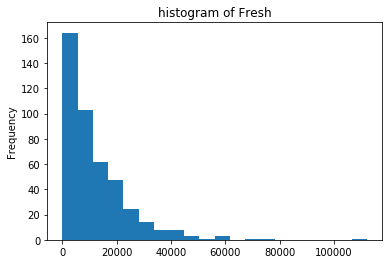

------------------------------------------------------------------------------------------------------------------------


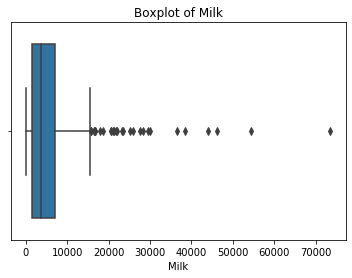

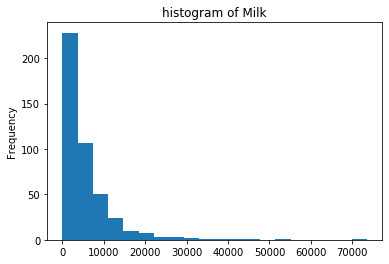

------------------------------------------------------------------------------------------------------------------------


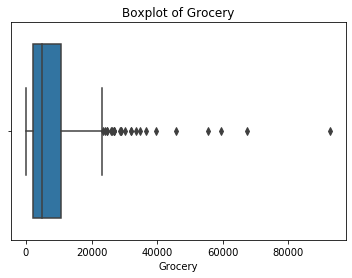

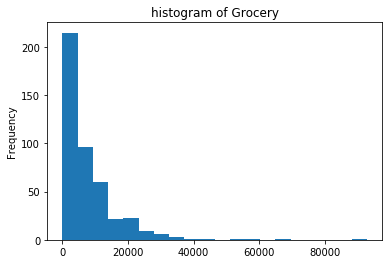

------------------------------------------------------------------------------------------------------------------------


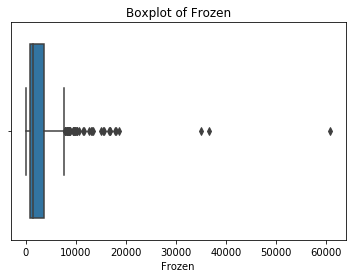

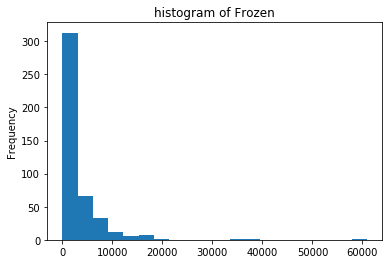

------------------------------------------------------------------------------------------------------------------------


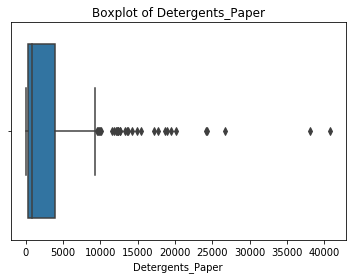

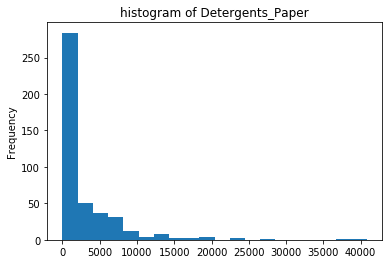

------------------------------------------------------------------------------------------------------------------------


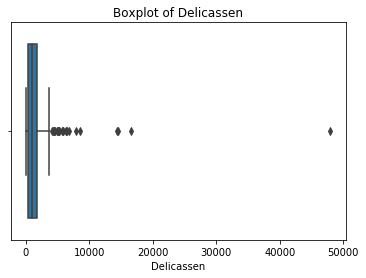

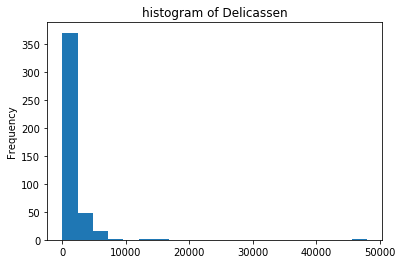

In [6]:
for k in cnames:
    continous_data(i=k)

# Scale Data

In [7]:
df1=np.log(df[cnames].copy())
df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [8]:
# replacing the outliers with their Inner fences
for k in list(df1.columns):
    IQR = np.percentile(df1[k],75) - np.percentile(df1[k],25)
    
    Outlier_top = np.percentile(df1[k],75) + 1.5*IQR
    Outlier_bottom = np.percentile(df1[k],25) - 1.5*IQR
    
    df1[k] = np.where(df1[k] > Outlier_top,Outlier_top,df1[k])
    df1[k] = np.where(df1[k] < Outlier_bottom,Outlier_bottom,df1[k])

In [9]:
def continous_data(i):
    if df1[i].dtype!='object':
        print('--'*60)
        sns.boxplot(df1[i])
        plt.title("Boxplot of "+str(i))
        plt.show()
        plt.title("histogram of "+str(i))        
        df1[i].plot.kde()
        plt.show()

------------------------------------------------------------------------------------------------------------------------


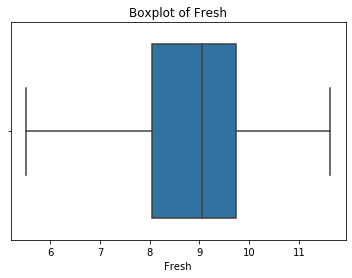

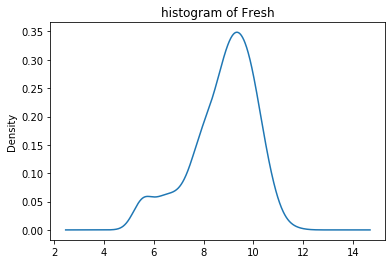

------------------------------------------------------------------------------------------------------------------------


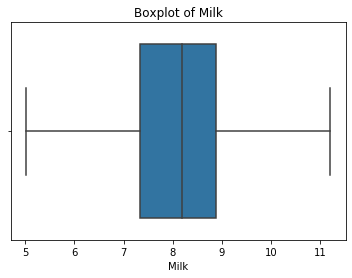

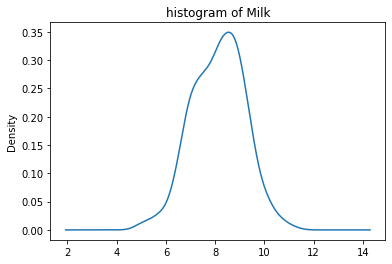

------------------------------------------------------------------------------------------------------------------------


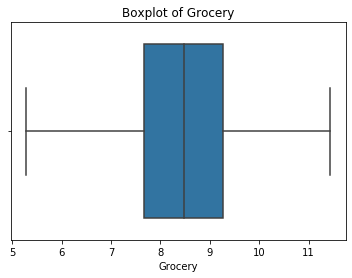

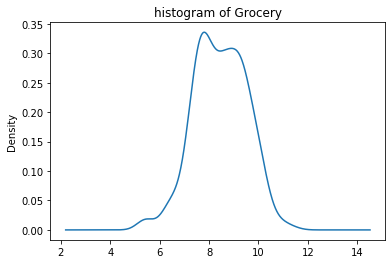

------------------------------------------------------------------------------------------------------------------------


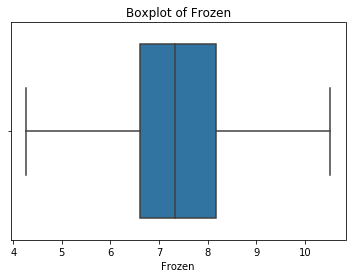

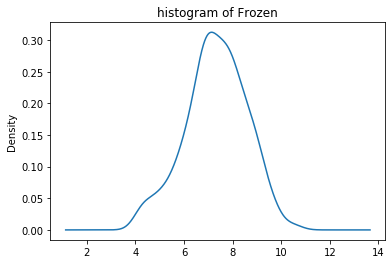

------------------------------------------------------------------------------------------------------------------------


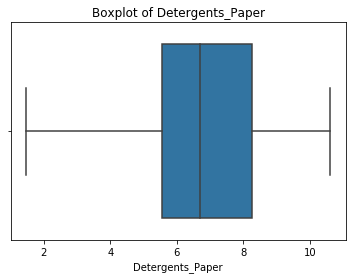

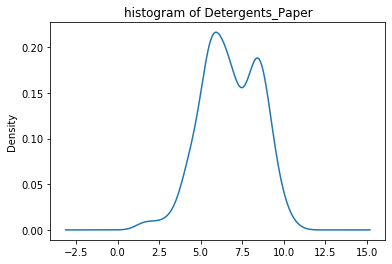

------------------------------------------------------------------------------------------------------------------------


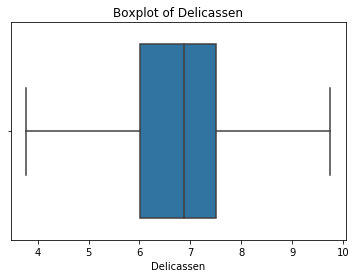

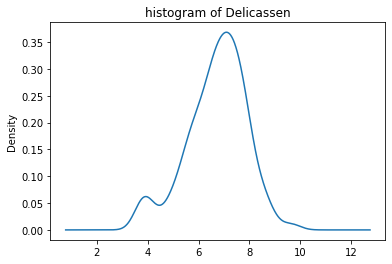

In [10]:
for k in cnames:
    continous_data(i=k)

In [17]:
df=pd.read_csv('Wholesale customers.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
df['Channel'] = df['Channel'].map({1:'Wholesale', 2:'Retail'})

In [19]:
df['Region'] = df['Region'].map({1:'Delhi',2:'Haryana',3:'Himachal'})
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Himachal,12669,9656,7561,214,2674,1338
1,Retail,Himachal,7057,9810,9568,1762,3293,1776
2,Retail,Himachal,6353,8808,7684,2405,3516,7844
3,Wholesale,Himachal,13265,1196,4221,6404,507,1788
4,Retail,Himachal,22615,5410,7198,3915,1777,5185


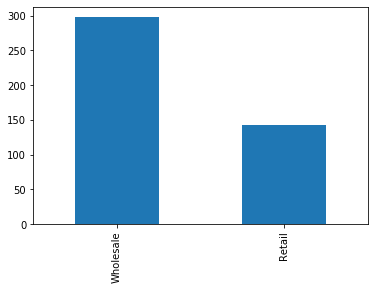

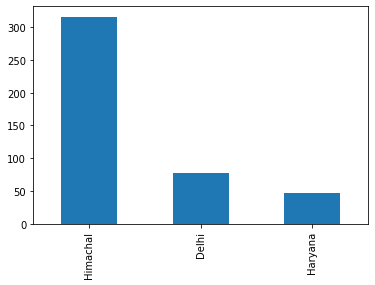

In [20]:
def categorical_data(i):
    df[i].value_counts().plot(kind='bar')

j_1 = ['Channel','Region']

for k in j_1:
    categorical_data(i=k)
    plt.show()

#Feature Selection  

Correlation Heat map of the data


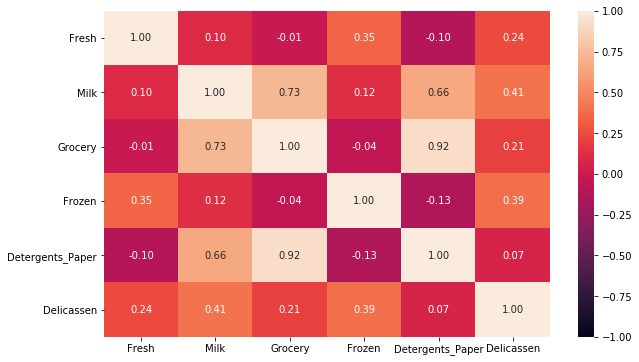

In [21]:
print('Correlation Heat map of the data')
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1)
plt.show()

Detergent_papers and grocery are closely related.

In [22]:
def scatterplot(i,j):
    sns.regplot(data=df1,x=i,y=j)
    plt.show()

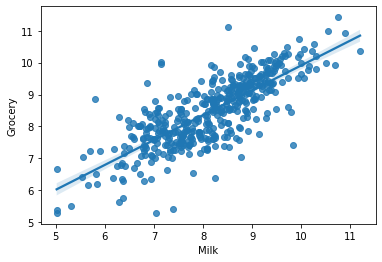

In [23]:
scatterplot(i='Milk',j='Grocery')

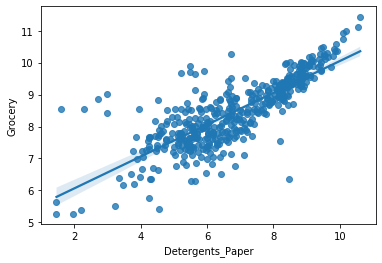

In [24]:
scatterplot(i='Detergents_Paper',j='Grocery')

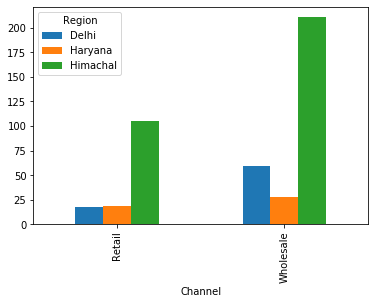

Region     Delhi  Haryana  Himachal
Channel                            
Retail        18       19       105
Wholesale     59       28       211


In [25]:
def categorical_multi(i,j):
    pd.crosstab(df[i],df[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(df[i],df[j]))

categorical_multi(i='Channel',j='Region')    

# Feature Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
#Clustering Libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
PCA_train = PCA(2).fit_transform(scaled_data)

print(scaled_data)

[[ 0.51143877  0.98272136  0.44934033 -1.55298573  0.64401633  0.42308381]
 [ 0.05960421  0.99751538  0.67005118  0.13057447  0.76551375  0.6659369 ]
 [-0.0215469   0.89677873  0.46446884  0.37900871  0.80374725  1.93975787]
 ...
 [ 0.61732553  1.424487    1.74898332 -0.98284368  1.64402093  0.70878898]
 [ 0.35083556 -0.49826824 -0.69452876 -0.29198981 -0.97072882  0.81979185]
 [-0.65779717 -0.64239624 -0.58447865 -2.43590108 -0.36182097 -2.36203366]]


In [29]:
ps = pd.DataFrame(PCA_train)
ps.head()

,0,1
0,-1.386846,0.332067
1,-1.470472,-0.522701
2,-1.587230,-1.272736
3,0.820048,-1.274575
4,-0.846980,-1.875816


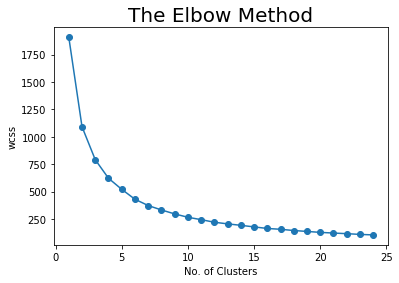

<Figure size 720x360 with 0 Axes>

In [32]:
#Elbow Method
wcss = []
for i in range(1, 25):
    km = KMeans(n_clusters = i, init = 'k-means++', 
                max_iter = 300, n_init = 10, random_state = 0)
    km.fit(ps)
    wcss.append(km.inertia_)
plt.plot(range(1, 25), wcss,marker='o')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.figure(figsize = (10,5))

plt.show()

In [34]:
from sklearn.metrics import silhouette_score
#Silhouette Method
no_of_clusters = [4, 5, 6,7] 
print("Average Silhouette Method\n")
for n_clusters in no_of_clusters: 
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(ps) 
    silhouette_avg = silhouette_score(ps, cluster_labels)
    print("For no of clusters =", n_clusters, 
          "The average silhouette_score is :", silhouette_avg) 

Average Silhouette Method

For no of clusters = 4 The average silhouette_score is : 0.33514745482006925
For no of clusters = 5 The average silhouette_score is : 0.3515769631734562
For no of clusters = 6 The average silhouette_score is : 0.35377437566111586
For no of clusters = 7 The average silhouette_score is : 0.36132930330579105


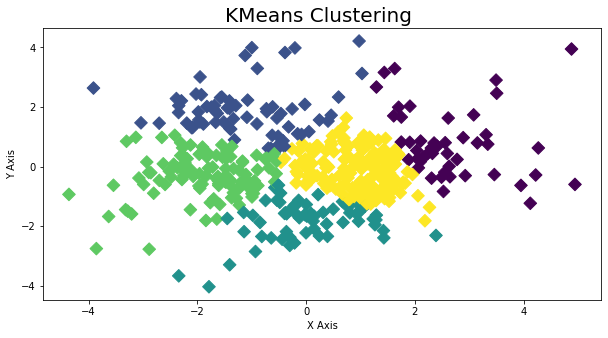

In [38]:
#K Means Clustering
kmean = KMeans(n_clusters=5, random_state=0).fit(ps)
y_kmeans = kmean.predict(ps)

plt.figure(figsize=(10,5))
plt.title("KMeans Clustering ",fontsize=20)
plt.scatter(ps[0], ps[1],c = y_kmeans, s=80, 
           marker='D')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

In [44]:
#Agglomerative Clustering

agc = AgglomerativeClustering(n_clusters=5,affinity = 'euclidean',linkage = 'ward')
y_agc_pred = agc.fit_predict(ps)
y_agc_pred




array([3, 3, 3, 1, 3, 0, 0, 3, 0, 3, 3, 1, 3, 3, 3, 2, 0, 1, 3, 0, 3, 2,
       4, 4, 3, 0, 2, 2, 3, 1, 3, 1, 2, 4, 0, 0, 4, 3, 0, 1, 4, 4, 0, 0,
       0, 3, 3, 4, 3, 3, 1, 0, 3, 0, 1, 0, 3, 0, 2, 3, 0, 3, 3, 3, 1, 0,
       0, 3, 3, 2, 1, 4, 1, 4, 3, 2, 1, 3, 2, 0, 2, 0, 3, 1, 0, 3, 3, 4,
       2, 4, 2, 1, 3, 1, 0, 0, 0, 2, 2, 2, 3, 3, 3, 4, 1, 1, 0, 3, 0, 0,
       1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 4, 1, 3, 0, 1, 1, 2,
       2, 2, 2, 2, 3, 0, 1, 1, 4, 1, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 0, 3, 1, 3, 0, 3, 2, 1, 3, 0, 3, 3, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       4, 1, 1, 1, 3, 4, 0, 4, 2, 2, 2, 0, 3, 0, 2, 2, 2, 0, 2, 4, 4, 3,
       1, 2, 3, 3, 4, 2, 2, 0, 2, 0, 0, 3, 1, 3, 2, 3, 3, 3, 0, 1, 0, 2,
       2, 0, 2, 1, 2, 1, 3, 2, 2, 1, 4, 0, 1, 0, 4, 0, 2, 1, 2, 4, 4, 1,
       2, 0, 3, 0, 1, 2, 1, 1, 2, 3, 1, 3, 3, 1, 0, 1, 4, 4, 0, 2, 2, 0,
       0, 3, 3, 1, 3, 2, 2, 2, 0, 1, 2, 2, 4, 2, 1, 3, 2, 3, 4, 1, 4, 2,
       2, 1, 2, 2, 0, 1, 1, 3, 1, 0, 1, 0, 3, 2, 3,

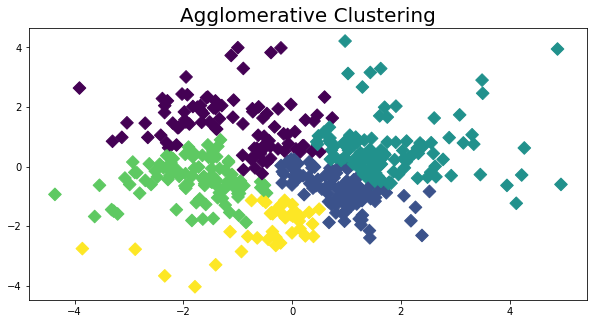

In [45]:
plt.figure(figsize =(10,5))
plt.scatter(ps[0], ps[1],c = y_agc_pred, s=80,marker='D')
plt.title('Agglomerative Clustering',fontsize = 20)
plt.show()

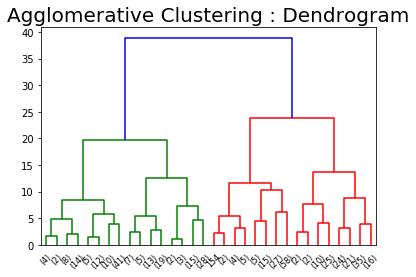

In [40]:
plt.title('Agglomerative Clustering : Dendrogram',fontsize = 20)
dend=shc.dendrogram(shc.linkage(ps,method='ward') ,truncate_mode='level', p=4) 
plt.show()

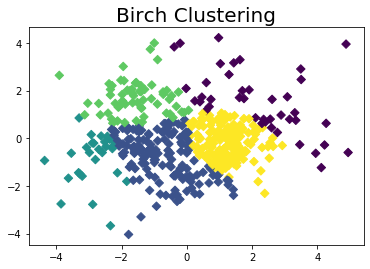

In [46]:
#birch clustering
brc = Birch(branching_factor=500, n_clusters=5, threshold=1.5)
brc.fit(ps)
labels = brc.predict(ps)

plt.title('Birch Clustering',fontsize = 20)
plt.scatter(ps[0], ps[1], c=labels,marker='D')

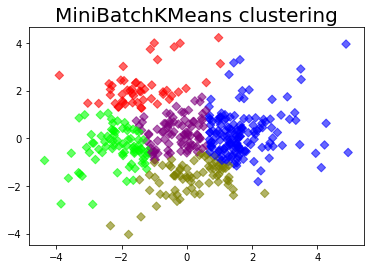

<Figure size 1440x1080 with 0 Axes>

In [47]:
mb = MiniBatchKMeans(n_clusters=5, random_state=0)
mb.fit(ps)

labels = mb.predict(ps)
plt.title('MiniBatchKMeans clustering',fontsize = 20)
plt.scatter(ps[0], ps[1], c=labels, cmap='brg',alpha=0.6,marker='D')
plt.figure(figsize=(20,15))
plt.show()